In [132]:
#CMSClaims_data.CSV
#2003 forward. CMS compiles claims data for Medicare and Medicaid patients across a variety of categories and years. 
#This includes Inpatient and Outpatient claims, Master Beneficiary Summary Files, and many other files. 
#Indicators from this data source have been computed by personnel in CDC's Division for Heart Disease and Stroke Prevention (DHDSP). 
#This is one of the datasets provided by the National Cardiovascular Disease Surveillance System. The system is designed to 
#integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated 
#risk factors in the United States. The data are organized by location (national and state) and indicator. The data can be plotted as trends 
#and stratified by sex and race/ethnicity.

import pandas as pd
import numpy as np


# Read data file
CMS = pd.read_csv("CMSClaims_data.csv")
print(CMS.head(3))

CMS.describe()

#print(CMS.dtypes)
#print(CMS.shape)

#Lets clean up the data of NaN values
CMS2 = CMS['RowId'].dropna()
CMS2.shape

#print(CMS['RowId'].unique()
#print(CMS['PriorityArea1'].unique()
#CMS['DataSource'].unique()
unique_counts = CMS['DataSource'].value_counts()
print(unique_counts)




   RowId  YearStart LocationAbbr   LocationDesc DataSource  PriorityArea1  \
0    NaN       2016           US  United States   Medicare            NaN   
1    NaN       2017           US  United States   Medicare            NaN   
2    NaN       2018           US  United States   Medicare            NaN   

   PriorityArea2  PriorityArea3  PriorityArea4                    Class  ...  \
0            NaN            NaN            NaN  Cardiovascular Diseases  ...   
1            NaN            NaN            NaN  Cardiovascular Diseases  ...   
2            NaN            NaN            NaN  Cardiovascular Diseases  ...   

  Break_Out_Category Break_Out ClassId TopicId  QuestionId  Data_Value_TypeID  \
0               Race   Unknown      C1      T1       MD101              Crude   
1               Race   Unknown      C1      T1       MD101              Crude   
2               Race   Unknown      C1      T1       MD101              Crude   

   BreakOutCategoryId  BreakOutId  LocationId

In [ ]:
#Data Definition
RowId                         float64 - Unique Row indentifer for each entry in the CMS table
YearStart                       int64  - the starting year of CMS related service
LocationAbbr                   object  - Geo location abbreviation ( country)
LocationDesc                   object  - Geo Location description 
DataSource                     object  - Data source and type (i.e. medicare, medicaid)
PriorityArea1                 float64  - 
PriorityArea2                 float64
PriorityArea3                 float64
PriorityArea4                 float64
Class                          object
Topic                          object
Question                       object
Data_Value_Type                object
Data_Value_Unit                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol    float64
Data_Value_Footnote           float64
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Break_Out_Category             object
Break_Out                      object
ClassId                        object
TopicId                        object
QuestionId                     object
Data_Value_TypeID              object
BreakOutCategoryId             object
BreakOutId                     object
LocationId                      int64
GeoLocation                    object

In [80]:
#Data Cleaning

#lets replace the NaNs in Row
CMS.isnull().values.any()
# Assuming 'RowIds' is your index column with NaN values
#CMS.reset_index(inplace=True)
CMS.rename(columns={'index': 'RowIds'}, inplace=True)
has_nans = CMS['RowId'].isna().any()
if has_nans:
    print("There are still NaN values in the 'RowId' column.")
else:
    print("No NaN values in the 'RowId' column.")

There are still NaN values in the 'RowId' column.


In [61]:
CMS.head()


,RowId,YearStart,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Class,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
0,NaN,2016,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
1,NaN,2017,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
2,NaN,2018,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
3,NaN,2019,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN
4,NaN,2020,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN


In [133]:
print(CMS['PriorityArea1'].unique)
print(CMS['PriorityArea2'].unique)
print(CMS['PriorityArea3'].unique)
print(CMS.shape)
# all of the columns in question have NaN. so lets drop them.

<bound method Series.unique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
33449   NaN
33450   NaN
33451   NaN
33452   NaN
33453   NaN
Name: PriorityArea1, Length: 33454, dtype: float64>
<bound method Series.unique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
33449   NaN
33450   NaN
33451   NaN
33452   NaN
33453   NaN
Name: PriorityArea2, Length: 33454, dtype: float64>
<bound method Series.unique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
33449   NaN
33450   NaN
33451   NaN
33452   NaN
33453   NaN
Name: PriorityArea3, Length: 33454, dtype: float64>
(33454, 30)


In [134]:
CMS2= CMS.dropna(axis=1, how='all')
CMS2.shape
CMS2.head()


,YearStart,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
0,2016,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2367.6,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
1,2017,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2403.7,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
2,2018,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2482.3,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
3,2019,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",5395.0,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN
4,2020,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",4505.4,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN


In [135]:
#it looks like the LocationAbbr and LocationDesc States and will list the US when the geoloc is unknown(NaN).
#lets check the rest of the dataset to see if anything else should be modified:
for column in CMS2.columns:
    unique_counts = CMS2[column].value_counts()
    print(f"Column: {column}")
    print(unique_counts)
    print("\n")


Column: YearStart
YearStart
2016    5609
2017    5577
2019    5575
2018    5572
2020    5561
2021    5560
Name: count, dtype: int64


Column: LocationAbbr
LocationAbbr
AR    1281
ME    1278
US     720
NC     648
MA     648
NY     648
FL     648
KS     648
GA     648
OH     648
CT     648
NJ     648
IL     648
CA     648
TX     648
CO     648
WA     648
MN     647
VI     647
MI     647
OK     647
WI     647
PA     647
IA     647
OR     647
NV     647
TN     646
IN     645
SC     644
DE     644
NB     644
MO     644
LA     644
KY     643
UT     643
AL     642
NM     641
ID     641
HI     640
NH     639
MS     639
RI     634
AK     632
WV     630
DC     630
WY     627
MT     625
SD     623
VT     617
ND     614
AZ       9
Name: count, dtype: int64


Column: LocationDesc
LocationDesc
United States     720
New Jersey        648
North Carolina    648
Massachusetts     648
New York          648
Maryland          648
Florida           648
Kansas            648
Ohio              648
Georgia    

In [ ]:
#The above looks like what we should expect for this data set. 

In [ ]:
""""Somethoughts on the dataset:
-Its possible to do a correlation between columns like DiseaseSeverity and the other columns like breakout, locationDesc, etc.  Heat map here would be useful to see the visual correlations
-we could do a count of claims by disease state and by Age, gender and race trended over the years. 
- the geoloc column could add a deep level of granularity with the dataset during the visualization stage
""""

In [136]:
CMS2.columns = CMS2.columns.str.strip()

# Rename the columns
CMS2.columns = [col.replace('class', 'DiseaseState') if 'class' in col else col.replace('type', 'DiseaseSeverity') if 'type' in col else col for col in CMS2.columns]

# Print the head of the DataFrame
print(CMS2.head(10))

   YearStart LocationAbbr   LocationDesc DataSource                    Class  \
0       2016           US  United States   Medicare  Cardiovascular Diseases   
1       2017           US  United States   Medicare  Cardiovascular Diseases   
2       2018           US  United States   Medicare  Cardiovascular Diseases   
3       2019           US  United States   Medicare  Cardiovascular Diseases   
4       2020           US  United States   Medicare  Cardiovascular Diseases   
5       2021           US  United States   Medicare  Cardiovascular Diseases   
6       2017           US  United States   Medicare  Cardiovascular Diseases   
7       2021           US  United States   Medicare  Cardiovascular Diseases   
8       2019           MT        Montana   Medicare  Cardiovascular Diseases   
9       2018           US  United States   Medicare  Cardiovascular Diseases   

                                   Topic  \
0           Major Cardiovascular Disease   
1           Major Cardiovascula

In [137]:
CMS2.dtypes

YearStart                  int64
LocationAbbr              object
LocationDesc              object
DataSource                object
Class                     object
Topic                     object
Question                  object
Data_Value_Type           object
Data_Value_Unit           object
Data_Value               float64
Data_Value_Alt           float64
Low_Confidence_Limit     float64
High_Confidence_Limit    float64
Break_Out_Category        object
Break_Out                 object
ClassId                   object
TopicId                   object
QuestionId                object
Data_Value_TypeID         object
BreakOutCategoryId        object
BreakOutId                object
LocationId                 int64
GeoLocation               object
dtype: object

In [138]:
CMS2.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Class',
       'Topic', 'Question', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Break_Out_Category', 'Break_Out', 'ClassId', 'TopicId', 'QuestionId',
       'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId', 'LocationId',
       'GeoLocation'],
      dtype='object')

In [140]:
# visualize some features:
CMS2.head()



,YearStart,LocationAbbr,LocationDesc,DataSource,Class,Topic,Question,Data_Value_Type,Data_Value_Unit,Data_Value,...,Break_Out_Category,Break_Out,ClassId,TopicId,QuestionId,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationId,GeoLocation
0,2016,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2367.6,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
1,2017,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2403.7,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
2,2018,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",2482.3,...,Race,Unknown,C1,T1,MD101,Crude,BOC04,RAC08,59,NaN
3,2019,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",5395.0,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN
4,2020,US,United States,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,Major cardiovascular disease hospitalization r...,Crude,"Rate per 100,000",4505.4,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,59,NaN


In [130]:
# Geoloc has a lot of NaNs. Will need to think of how to deal with them.

In [ ]:

# 1.Identify features - LocationDesc,Topic,Break_Out,Break_Out_Category
# 2. find relationships between features - i.e.  Race or gender vs topic, 
# 3. create histograph of the features
# 4. Pearson correlation coefficients
# create a plot to show Data_ value  incidences per 100,000  by locationDesc

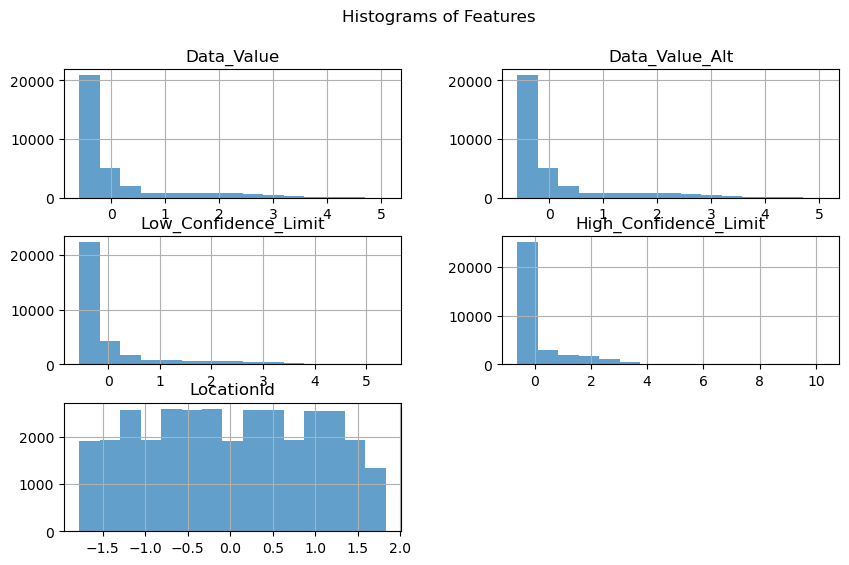

In [114]:
# 1.Identify features - LocationDesc,Topic,Break_Out,Break_Out_Category
import pandas as pd
import matplotlib.pyplot as plt
CMS2.hist(figsize=(10, 6), bins=15, alpha=0.7)
plt.suptitle('Histograms of Features')
plt.show()

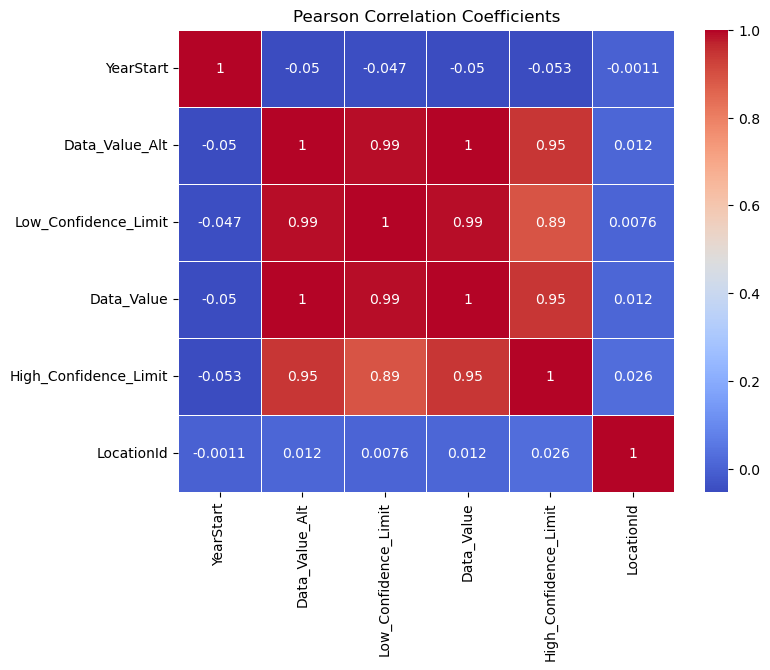

In [89]:
# 4. Pearson correlation coefficients
import seaborn as sns

selected_columns = ["YearStart", "Data_Value_Alt", "Low_Confidence_Limit", "Data_Value","High_Confidence_Limit","LocationId"]
correlation_matrix = CMS2[selected_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficients')
plt.show()

In [112]:
#PreProcessing for CMS dataset.
#CMS2.columns
CMS2.head(5)


,LocationAbbr,DataSource,Class,Topic,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Break_Out_Category,...,Break_Out_75+,Break_Out_Female,Break_Out_Hispanic,Break_Out_Male,Break_Out_Non-Hispanic Asian,Break_Out_Non-Hispanic Black,Break_Out_Non-Hispanic White,Break_Out_Other,Break_Out_Overall,Break_Out_Unknown
YearStart,,,,,,,,,,,,,,,,,,,,,
2016-01-01,US,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,"Rate per 100,000",1.065312,1.065312,1.179379,0.830508,Race,...,False,False,False,False,False,False,False,False,False,True
2017-01-01,US,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,"Rate per 100,000",1.090571,1.090571,1.209165,0.849806,Race,...,False,False,False,False,False,False,False,False,False,True
2018-01-01,US,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,"Rate per 100,000",1.145568,1.145568,1.269636,0.895333,Race,...,False,False,False,False,False,False,False,False,False,True
2019-01-01,US,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,"Rate per 100,000",3.183597,3.183597,3.472034,2.617097,Gender,...,False,False,False,True,False,False,False,False,False,False
2020-01-01,US,Medicare,Cardiovascular Diseases,Major Cardiovascular Disease,"Rate per 100,000",2.561140,2.561140,2.807154,2.084938,Gender,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
#Lets try a K means Clustering model  between Location and Disease rates

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

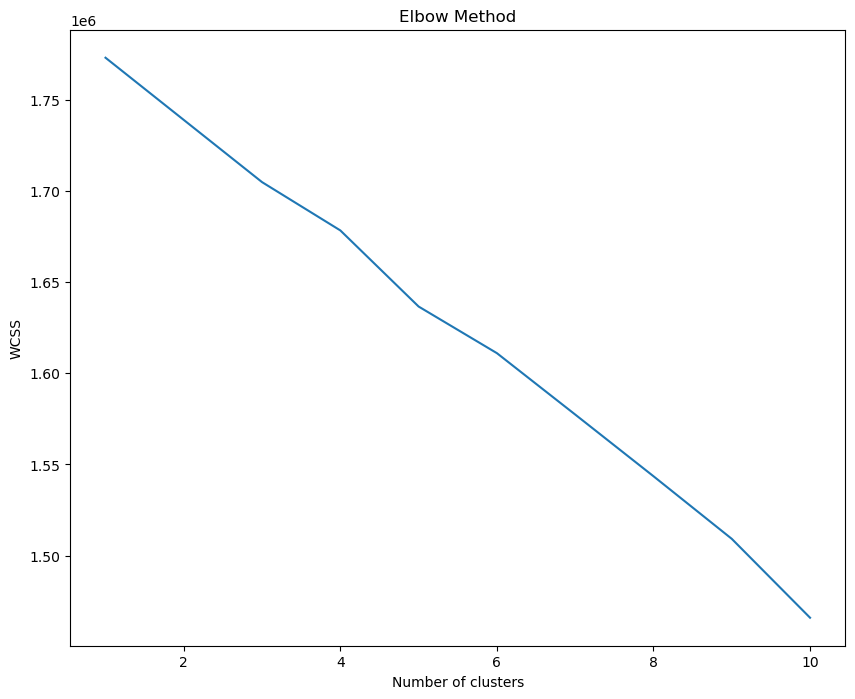

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Handling Missing Values
CMS2['GeoLocation'].fillna("Unknown", inplace=True)

# Normalization/Standardization of 'Data_Value'
scaler = StandardScaler()
CMS2['Data_Value'] = scaler.fit_transform(CMS2[['Data_Value']])

# Selecting features for clustering: 'Data_Value' and geographic dummy variables
features_for_clustering = ['Data_Value'] + [col for col in CMS2.columns if col.startswith('LocationDesc_')]
data_for_clustering = CMS2[features_for_clustering]

# Standardize the features for clustering (if not already done)
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choosing the number of clusters based on the Elbow Method
# This needs to be chosen based on where the elbow of the plot is, which might not be clear
# If there's no clear elbow, you might choose a number based on domain knowledge or other criteria
# The chosen 'k' should replace the placeholder value
k = 3  # Example placeholder value

# Applying k-means to the data
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_for_clustering_scaled)

# Adding cluster labels to your original DataFrame
CMS2['Cluster_Labels'] = cluster_labels

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

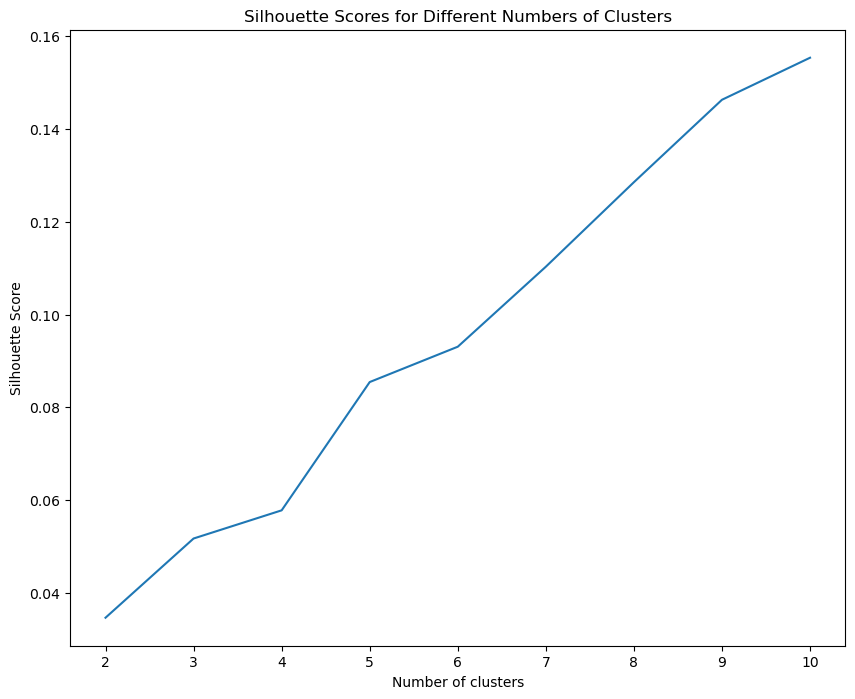

Optimal number of clusters based on silhouette score: 10


C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
# elbow method for clustering failed. attempting silhouette score method

from sklearn.metrics import silhouette_score

# Assuming data_for_clustering_scaled is your standardized data ready for clustering

silhouette_scores = []

# Try different numbers of clusters
for i in range(2, 11):  # Silhouette score is only valid for 2 or more clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data_for_clustering_scaled)
    silhouette_avg = silhouette_score(data_for_clustering_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Determine the number of clusters with the highest silhouette score
optimal_clusters = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print('Optimal number of clusters based on silhouette score:', optimal_clusters)

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_for_clustering_scaled)

# Add the cluster labels to your DataFrame
CMS2['Cluster_Labels'] = cluster_labels

In [ ]:
# this should look a bit different than how it should be. It maybe that clustering model isnt best for this dataset. Will try a time series instead. 


In [ ]:
#lets try a simple ARIMA time series analysis

ADF Statistic: -6.300885
p-value: 0.000000


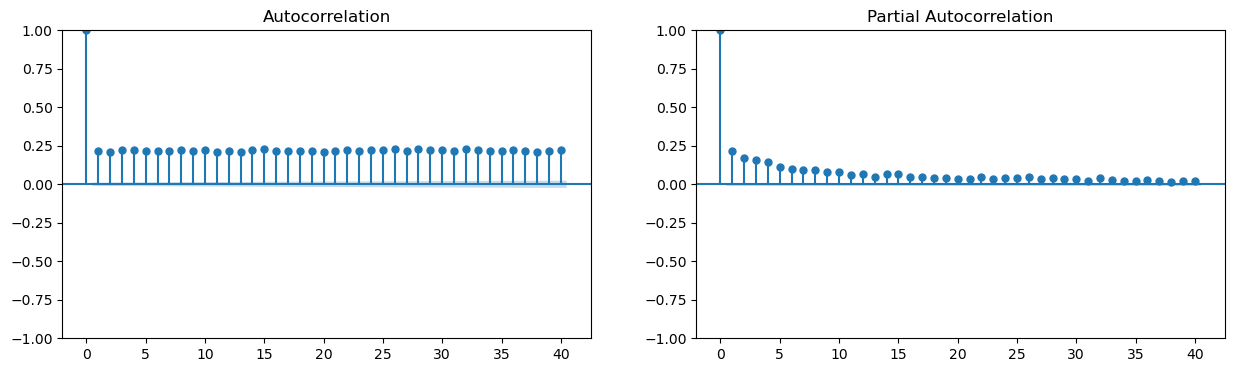

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates

                               SARIMAX Results                                
Dep. Variable:             Data_Value   No. Observations:                33454
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -43414.700
Date:                Fri, 26 Jan 2024   AIC                          86835.400
Time:                        18:26:44   BIC                          86860.654
Sample:                             0   HQIC                         86843.461
                              - 33454                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0035      0.004     -0.968      0.333      -0.011       0.004
ma.L1         -0.9939      0.001  -1871.723      0.000      -0.995      -0.993
sigma2         0.7847      0.004    193.031      0.0

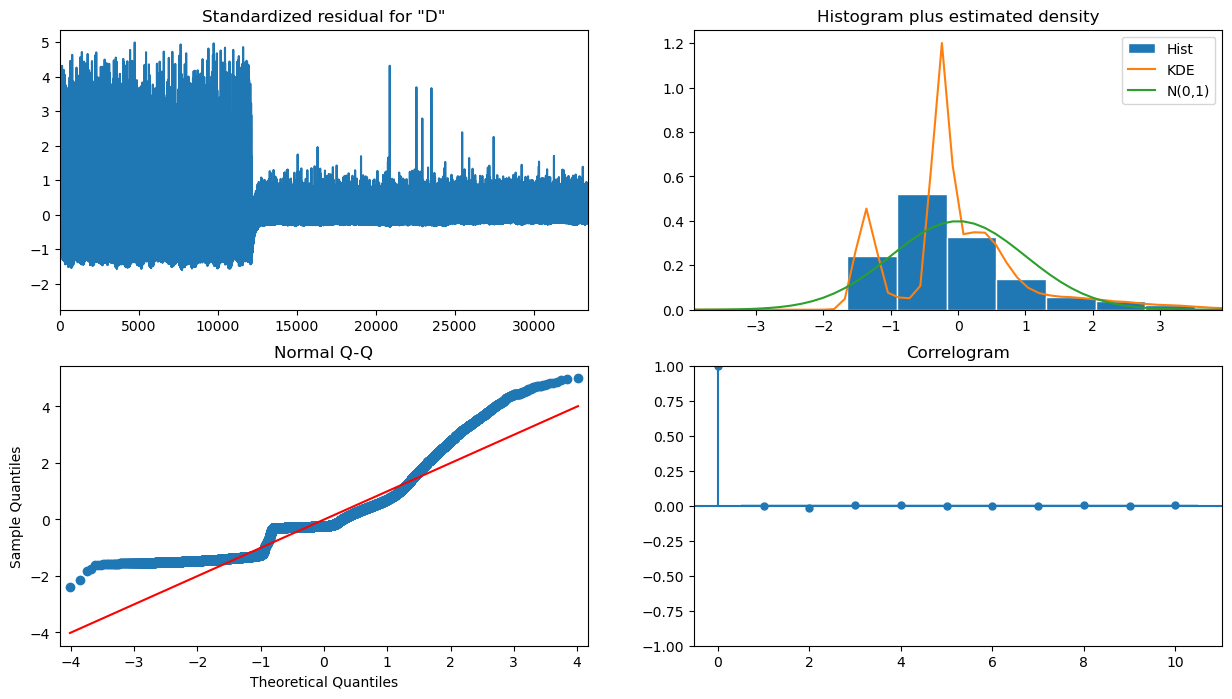

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


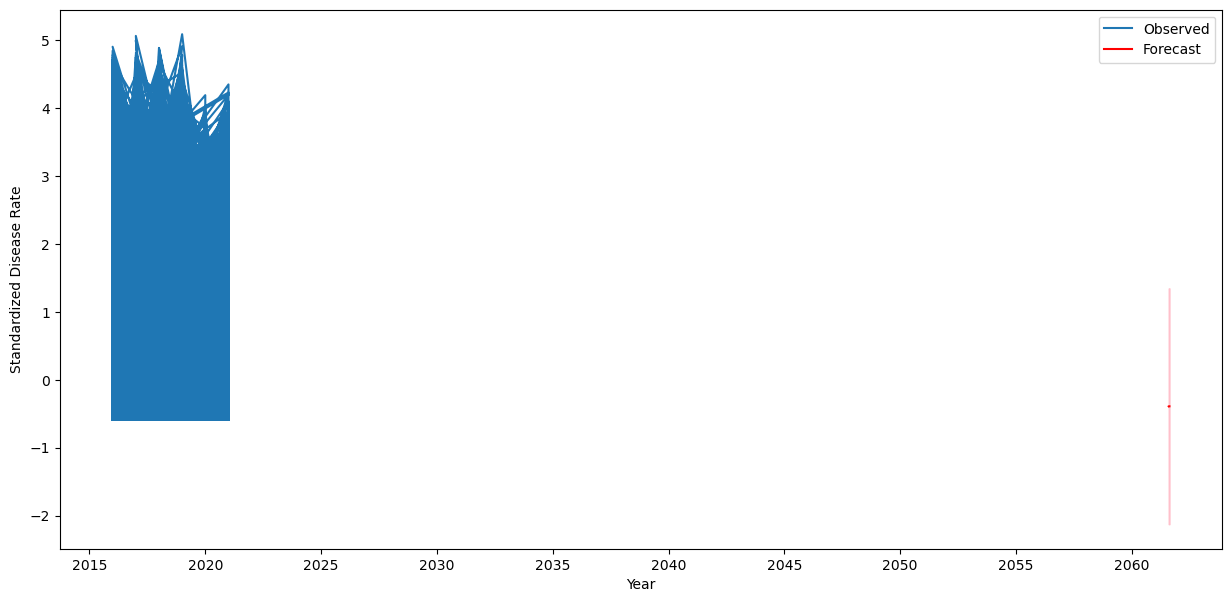

In [122]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Check for stationarity
result = adfuller(CMS2['Data_Value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If the time series is not stationary, difference the data
if result[1] > 0.05:
    CMS2['Data_Value_Diff'] = CMS2['Data_Value'].diff().dropna()

# Plot ACF and PACF to determine potential ARIMA(p, d, q) orders
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(CMS2['Data_Value'].dropna(), lags=40, ax=axes[0])
plot_pacf(CMS2['Data_Value'].dropna(), lags=40, ax=axes[1])
plt.show()

# Fit the ARIMA model (using placeholder values for p, d, q)
# Replace with your chosen values
arima_model = ARIMA(CMS2['Data_Value'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Summary of the model
print(arima_result.summary())

# Diagnostics plot
arima_result.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecasting
forecast = arima_result.get_forecast(steps=12)  
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(15, 7))
plt.plot(CMS2.index, CMS2['Data_Value'], label='Observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='Forecast')
plt.fill_between(mean_forecast.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.xlabel('Year')
plt.ylabel('Standardized Disease Rate')
plt.legend()
plt.show()

In [150]:
import pandas as pd
import statsmodels.api as sm

if not pd.api.types.is_numeric_dtype(CMS2['YearStart']):
    CMS2['YearStart'] = pd.to_numeric(CMS2['YearStart'], errors='coerce')

# Independent variable
X_simple = CMS2[['YearStart']]

# Dependent variable
y_simple = CMS2['Data_Value']

# Check if 'Data_Value' is numeric and handle any NaNs
if not pd.api.types.is_numeric_dtype(y_simple):
    y_simple = pd.to_numeric(y_simple, errors='coerce')
y_simple = y_simple.dropna()

# Ensure no NaN values in X_simple
X_simple = X_simple.dropna()

# Adding a constant to the model (for the intercept)
X_simple = sm.add_constant(X_simple)

# Fit the linear regression model
model_simple = sm.OLS(y_simple, X_simple).fit()

# Print the summary of the regression
model_simple_summary = model_simple.summary()
model_simple_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Value   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     84.70
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           3.66e-20
Time:                        12:51:54   Log-Likelihood:            -2.9047e+05
No. Observations:               33454   AIC:                         5.809e+05
Df Residuals:                   33452   BIC:                         5.810e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.57e+04   9220.082      9.295      0.000    6.76e+04    1.04e+05
YearStart    -42.0392      4.568     -9.203      0.000     -50.992     -33.086
==============================================================================
Omnibus:                    13475.560   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46241.115
Skew:                           2.108   Prob(JB):                         0.00
Kurtosis:                       6.924   Cond. No.                     2.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# This  shows a low explainability between year start and disease rate ( data value). 
# Lets try incorporating location ( specific to Kansas) in this analysis

In [152]:
kansas_data = CMS2[CMS2['LocationAbbr'] == 'KS']

# Independent variable: 'YearStart'
X_kansas = kansas_data[['YearStart']]

# Dependent variable: 'Data_Value'
y_kansas = kansas_data['Data_Value']

# Check if 'Data_Value' is numeric and handle any NaNs
if not pd.api.types.is_numeric_dtype(y_kansas):
    y_kansas = pd.to_numeric(y_kansas, errors='coerce')
y_kansas = y_kansas.dropna()

# Ensure no NaN values in X_kansas
X_kansas = X_kansas.dropna()

# Adding a constant to the model (for the intercept)
X_kansas = sm.add_constant(X_kansas)

# Fit the linear regression model
model_kansas = sm.OLS(y_kansas, X_kansas).fit()

# Print the summary of the regression
model_kansas_summary = model_kansas.summary()
model_kansas_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Value   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.237
Date:                Mon, 29 Jan 2024   Prob (F-statistic):              0.266
Time:                        13:00:56   Log-Likelihood:                -5643.1
No. Observations:                 648   AIC:                         1.129e+04
Df Residuals:                     646   BIC:                         1.130e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.665e+04   6.81e+04      1.125      0.261   -5.71e+04     2.1e+05
YearStart    -37.5408     33.750     -1.112      0.266    -103.813      28.731
==============================================================================
Omnibus:                      260.001   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.894
Skew:                           2.039   Prob(JB):                    4.88e-167
Kurtosis:                       6.426   Cond. No.                     2.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#the results are still not looking good. it has the same consquences as the previous regression model

In [153]:
#Lets try a random forest model with a focus on disease rate and geography(state)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Preprocessing
# Creating dummy variables for 'LocationAbbr'
location_dummies = pd.get_dummies(CMS2['LocationAbbr'], drop_first=True)
X = location_dummies
y = CMS2['Data_Value']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Model Evaluation
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

# Feature Importance
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

RMSE:  1408.3734833795666


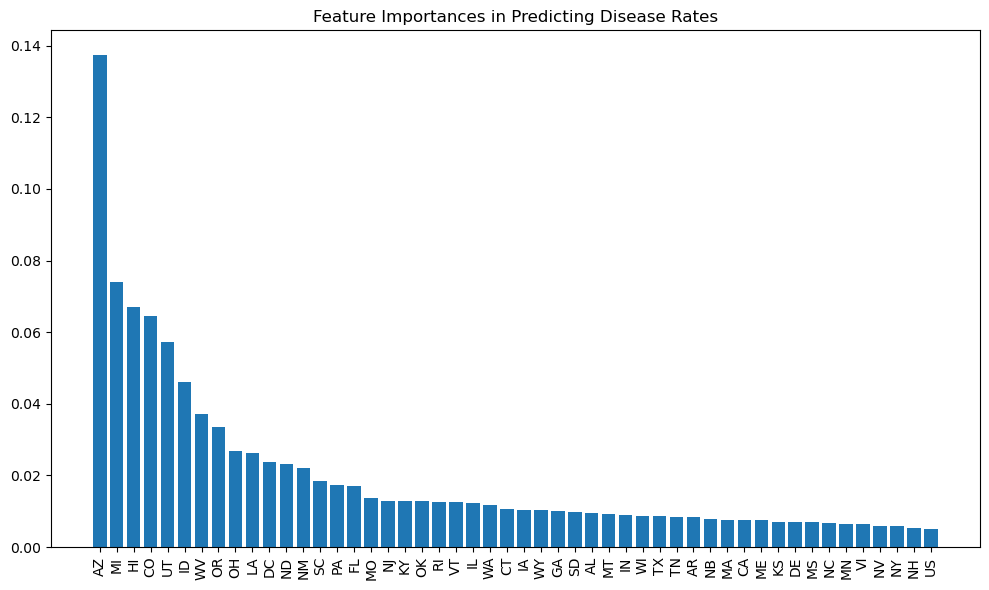

In [154]:
# Lets get an idea of the feature importance to use for this model

sorted_indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Predicting Disease Rates")
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# it certainly looks like the feature importance of disease rate is highest for AZ and MI vs NY, NH. this can mean that  disease rate may not vary from year to year for NH 
# for example. Or it has a low presense in the data.  This gives us an idea of the predictive power of the random forest model.  Lets explore the AZ and MI in more depth

In [155]:
#Cross validation check for the random forest model
from sklearn.model_selection import cross_val_score

# Define the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the RMSE from cross-validation
cv_rmse = np.sqrt(-cv_scores)

# Print the RMSE scores for all folds
print("RMSE scores for all folds:", cv_rmse)
print("Mean RMSE:", cv_rmse.mean())

RMSE scores for all folds: [2279.44531485 2057.81614061  751.78213732  778.00571955  828.19066569]
Mean RMSE: 1339.047995604021
